In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("C:\\Users\\Shree com\\Desktop\\Data\\titanic.csv" , usecols = ['Age' , 'Fare' , 'Survived'])

In [3]:
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [4]:
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import accuracy_score 

from sklearn.model_selection import cross_val_score 

from sklearn.preprocessing import KBinsDiscretizer 


from sklearn.compose import ColumnTransformer 

In [5]:
df.dropna(inplace = True) 

In [6]:
df.shape 

(331, 3)

In [7]:
x = df.iloc[: , 1:]

In [8]:
y = df.iloc[: , 0]

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [10]:
x_train.head(3) 

,Age,Fare
129,24.0,8.05
189,40.0,13.00
7,26.0,29.00


In [11]:
clf = DecisionTreeClassifier()  

clf.fit(x_train,  y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(x_test)

In [13]:
accuracy_score(y_test , y_pred)

0.5671641791044776

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier() ,x ,y , cv = 10 , scoring = "accuracy"))

0.5681818181818181

In [15]:
kbin_age = KBinsDiscretizer(n_bins = 15 , encode = 'ordinal'  , strategy = 'quantile')

In [16]:
kbin_fare = KBinsDiscretizer(n_bins = 15 , encode = 'ordinal' , strategy = 'quantile') 

In [17]:
trf = ColumnTransformer([
    ('first' , kbin_age , [0]) , 
    ('second' , kbin_fare , [1])
])

In [18]:
trf

ColumnTransformer(transformers=[('first',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [0]),
                                ('second',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [1])])

In [19]:
x_train_trf = trf.fit_transform(x_train)

In [20]:
x_test_trf = trf.transform(x_test)

In [21]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.17      , 10.        , 18.        , 20.        , 22.        ,
              23.66666667, 25.        , 27.        , 29.        , 31.        ,
              35.        , 39.        , 43.        , 47.93333333, 55.        ,
              76.        ])                                                   ],
      dtype=object)

In [22]:
output = pd.DataFrame({
    'age' : x_train['Age'],
    'age_trf' : x_train_trf[: , 0] , 
    'Fare' : x_train['Fare'] , 
    'Fare_trf' : x_train_trf[: , 1]
})

In [23]:
output

,age,age_trf,Fare,Fare_trf
129,24.0,5.0,8.0500,3.0
189,40.0,11.0,13.0000,5.0
7,26.0,6.0,29.0000,9.0
260,36.5,10.0,17.4000,7.0
254,32.5,9.0,9.5000,4.0
...,...,...,...,...
81,67.0,14.0,221.7792,14.0
259,21.0,3.0,7.7750,1.0
0,34.5,9.0,7.8292,1.0
369,29.0,8.0,13.8583,6.0


In [24]:
output['age_labels'] = pd.cut(x = x_train['Age'] , bins = trf.named_transformers_['first'].bin_edges_[0].tolist())

output['fare_labels']  = pd.cut(x = x_train['Fare'] , bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [25]:
output.sample(5)

,age,age_trf,Fare,Fare_trf,age_labels,fare_labels
389,6.0,0.0,21.0750,8.0,"(0.17, 10.0]","(21.0, 26.0]"
260,36.5,10.0,17.4000,7.0,"(35.0, 39.0]","(15.246, 21.0]"
369,29.0,8.0,13.8583,6.0,"(27.0, 29.0]","(13.083, 15.246]"
103,26.0,6.0,7.7750,1.0,"(25.0, 27.0]","(7.65, 7.85]"
349,31.0,9.0,21.0000,8.0,"(29.0, 31.0]","(15.246, 21.0]"


In [26]:
clf = DecisionTreeClassifier() 
clf.fit(x_train_trf , y_train) 

DecisionTreeClassifier()

In [27]:
y_pred2 = clf.predict(x_test_trf)

In [28]:
accuracy_score(y_test , y_pred2)

0.582089552238806

In [29]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier() , x , y , scoring = 'accuracy'))

0.5741745816372681

In [30]:
def discretize(bins , strategy): 
    kbin_age = KBinsDiscretizer(n_bins = bins , encode = 'ordinal' , strategy = strategy )
    kbin_fare = KBinsDiscretizer(n_bins = bins , encode = 'ordinal' , strategy = strategy) 
    
    trf = ColumnTransformer([
        ('first' , kbin_age , [0]), 
        ('second' , kbin_fare , [1])
    ])
    
    x_trf  = trf.fit_transform(x) 
    print(np.mean(cross_val_score(DecisionTreeClassifier() , x , y, scoring = 'accuracy')))
    
    plt.figure(figsize = (14,4))
    plt.subplot(121) 
    plt.hist(x['Age'])
    plt.title(" Age Before") 
    
    plt.subplot(122) 
    plt.hist(x_trf[: , 0] , color = 'red')
    plt.title("Age After")
    
    plt.show()  
    
    plt.figure(figsize = (14 , 4))
    plt.subplot(121) 
    plt.hist(x['Fare'])
    plt.title("Fare Before")
    
    plt.subplot(122) 
    plt.hist(x_trf[: , 1] , color = 'red')
    plt.title("Fare After")
    
    plt.show() 
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.5772953414744459


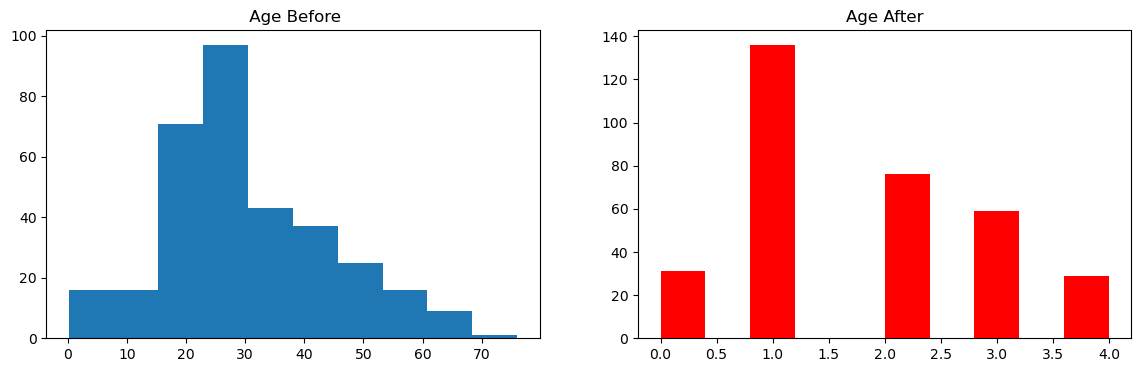

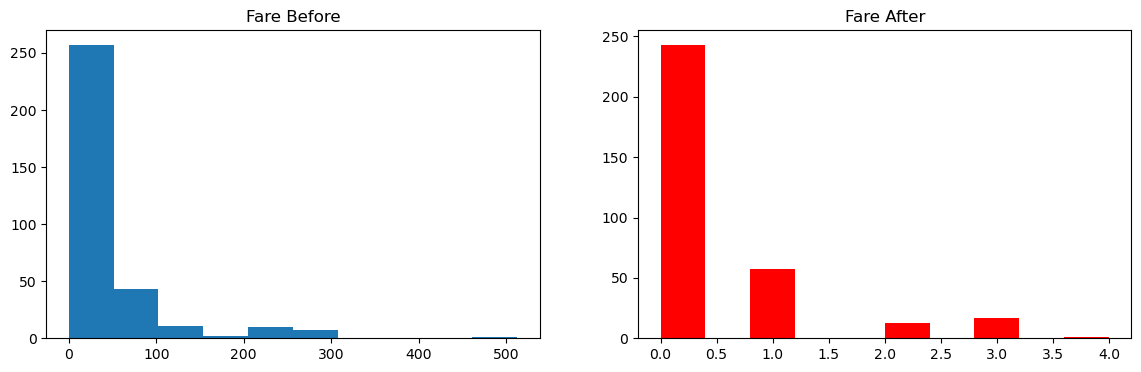

In [31]:
discretize(5 , 'kmeans')